In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from interp import dividedDiffTable, evalDDpoly, eval_lagrange

# Prelab



# Question 1

In [5]:

def monomial(xeval, xint, yint, N):
   # xint - x_j
   # yint - f(x_j)
   # N - num j

   V = np.vander(xint)
   a = np.dot(np.linalg.inv(V), yint)

   poly = np.poly1d(a)

   return poly(xeval)

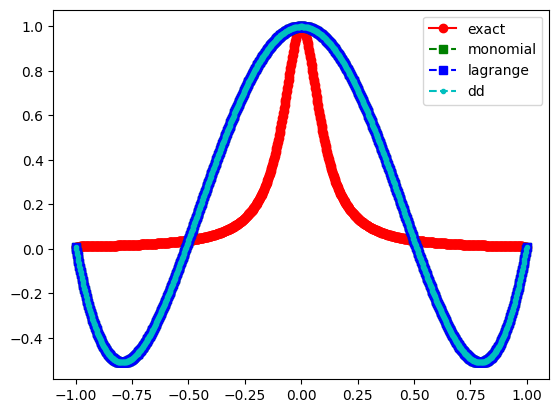

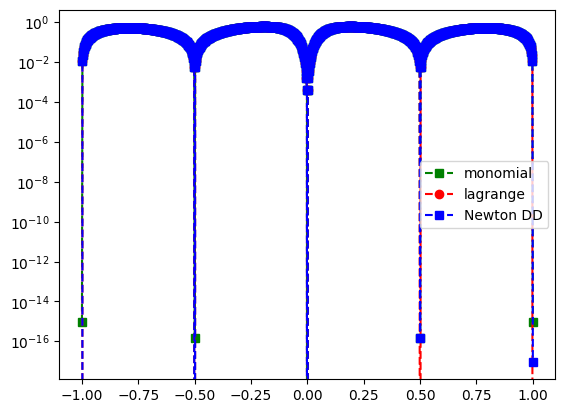

In [6]:
f = lambda x: 1/(1 + (10*x)**2)

N = 4
''' interval'''
a = -1
b = 1


''' create equispaced interpolation nodes'''
xint = np.linspace(a,b,N+1)

''' create interpolation data'''
yint = f(xint)

''' create points for evaluating the Lagrange interpolating polynomial'''
Neval = 1000
xeval = np.linspace(a,b,Neval+1)
yeval_m = np.zeros(Neval+1)
yeval_l= np.zeros(Neval+1)
yeval_dd = np.zeros(Neval+1)

'''Initialize and populate the first columns of the 
    divided difference matrix. We will pass the x vector'''
y = np.zeros( (N+1, N+1) )
    
for j in range(N+1):
    y[j][0]  = yint[j]

y = dividedDiffTable(xint, y, N+1)
''' evaluate lagrange poly '''
for kk in range(Neval+1):
    yeval_m[kk] = monomial(xeval[kk], xint, yint, N)
    yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
    yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
        




''' create vector with exact values'''
fex = f(xeval)
    

plt.figure()    
plt.plot(xeval,fex,'ro-', label='exact')
plt.plot(xeval, yeval_m, 'gs--', label='monomial')
plt.plot(xeval,yeval_l,'bs--', label='lagrange') 
plt.plot(xeval,yeval_dd,'c.--', label='dd')
plt.legend()

plt.figure() 
err_l = abs(yeval_l-fex)
err_dd = abs(yeval_dd-fex)
err_m = abs(yeval_m-fex)
plt.semilogy(xeval,err_m, 'gs--', label='monomial')
plt.semilogy(xeval,err_l,'ro--',label='lagrange')
plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
plt.legend()
plt.show()

# Question 2

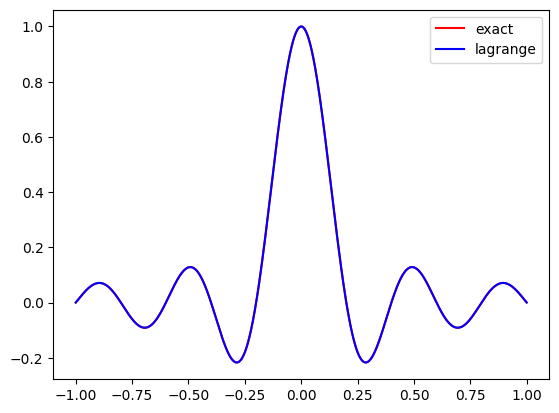

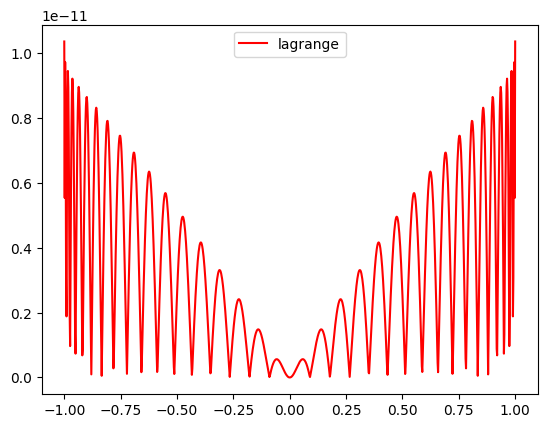

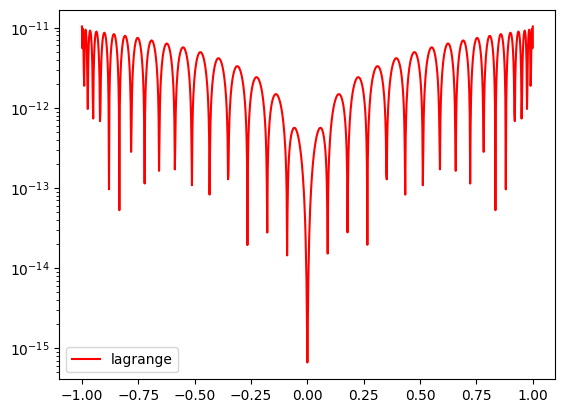

In [8]:
f = lambda x: np.sinc(5*x)

N = 34
''' interval'''
a = -1
b = 1


''' create equispaced interpolation nodes'''
xint = xint = np.cos((2*np.linspace(1,N,N+1)-1)*np.pi/(2*N))

''' create interpolation data'''
yint = f(xint)

''' create points for evaluating the Lagrange interpolating polynomial'''
Neval = 1000
xeval = np.linspace(a,b,Neval+1)
# yeval_m = np.zeros(Neval+1)
yeval_l= np.zeros(Neval+1)
# yeval_dd = np.zeros(Neval+1)

'''Initialize and populate the first columns of the 
    divided difference matrix. We will pass the x vector'''
y = np.zeros( (N+1, N+1) )
    
for j in range(N+1):
    y[j][0]  = yint[j]

y = dividedDiffTable(xint, y, N+1)
''' evaluate lagrange poly '''
for kk in range(Neval+1):
    # yeval_m[kk] = monomial(xeval[kk], xint, yint, N)
    yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
    # yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
        


''' create vector with exact values'''
fex = f(xeval)
    

plt.figure()    
plt.plot(xeval,fex,'r-', label='exact')
# plt.plot(xeval, yeval_m, 'gs--', label='monomial')
plt.plot(xeval,yeval_l,'b-', label='lagrange') 
# plt.plot(xeval,yeval_dd,'c.--', label='dd')
plt.legend()

plt.figure() 
err_l = abs(yeval_l-fex)
# err_dd = abs(yeval_dd-fex)
# err_m = abs(yeval_m-fex)
# plt.semilogy(xeval,err_m, 'gs--', label='monomial')
plt.plot(xeval,err_l,'r-',label='lagrange')
# plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
plt.legend()
plt.show()

plt.figure() 
# err_dd = abs(yeval_dd-fex)
# err_m = abs(yeval_m-fex)
# plt.semilogy(xeval,err_m, 'gs--', label='monomial')
plt.semilogy(xeval,err_l,'r-',label='lagrange')
# plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
plt.legend()
plt.show()